In [68]:
import numpy as np
import pandas as pd

from pydataset import data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import acquire
import prepare

In [ ]:
# Exercises
# Using the titanic data, in your classification-exercises repository, create a notebook, 
# model.ipynb where you will do the following:

# What is your baseline prediction? What is your baseline accuracy? remember: your baseline 
# prediction for a classification problem is predicting the most prevelant class in the 
# training dataset (the mode). When you make those predictions, 
# what is your accuracy? This is your baseline accuracy.

# Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

# Evaluate your in-sample results using the model score, confusion matrix, and classification report.

# Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, 
# recall, f1-score, and support.

# Run through steps 2-4 using a different max_depth value.

# Which model performs better on your in-sample data?

# Which model performs best on your out-of-sample data, the validate set?

# Work through these same exercises using the Telco dataset.
# Experiment with this model on other datasets with a higher number of output classes.

In [23]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [24]:
df = prepare.prep_titanic_data(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              714 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 94.0+ KB


In [26]:
#nulls in the age column
df.age = df.age.fillna(df.age.mean())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              891 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 94.0+ KB


In [28]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [29]:
#drop additional columns
df = df.drop(columns=['pclass', 'embarked', 'embarked_encode', 'passenger_id'])
df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,Southampton,1


In [30]:
#encode additional object/cols
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,0,1


In [31]:
#train test validate from prepare
train, validate, test = prepare.split(df, stratify_by='survived')

In [32]:
#makesure the target variable is separated from x
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [37]:
#establish baseline, whats mode?
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [38]:
#baseline
baseline = y_train.mode()
#boolean to match baseline prediction and reality
matches_baseline_prediction = (y_train==0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")                              


Baseline accuracy: 0.62


In [ ]:
# Fit the decision tree classifier to your training sample and transform 
#(i.e. make predictions on the training sample)

In [39]:
#model
tree1 = DecisionTreeClassifier(max_depth=5, random_state=123)

#fit the model on train
tree1 = tree1.fit(X_train, y_train)

#utilize model
y_predictions = tree1.predict(X_train)

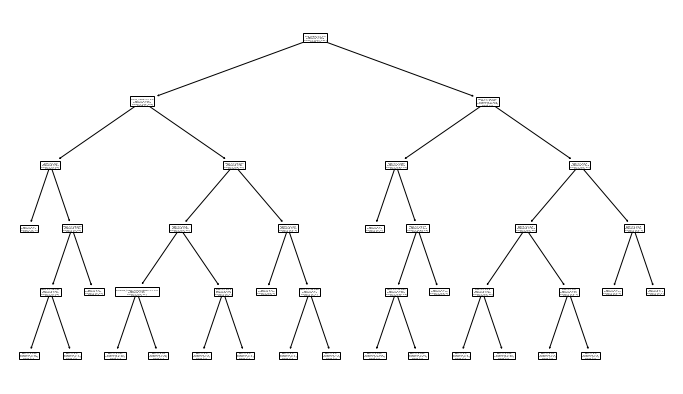

In [43]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [ ]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [44]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


C:\Users\Timmy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


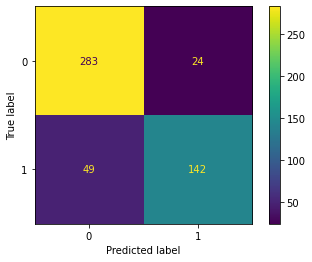

In [45]:
plot_confusion_matrix(tree1, X_train, y_train)

In [46]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       307
           1       0.86      0.74      0.80       191

    accuracy                           0.85       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.85      0.85      0.85       498



In [48]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.852410,0.855422,0.853414,0.853916,0.853565
recall,0.921824,0.743455,0.853414,0.832640,0.853414
f1-score,0.885759,0.795518,0.853414,0.840639,0.851149
support,307.000000,191.000000,0.853414,498.000000,498.000000


In [ ]:
# Compute: Accuracy, true positive rate, false positive rate, true negative rate, 
# false negative rate, precision, recall, f1-score, and support.

In [50]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

TN, FP, FN, TP

(283, 24, 49, 142)

In [51]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [52]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8534136546184738 

True Positive Rate/Sensitivity/Recall/Power: 0.743455497382199 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0781758957654723 

True Negative Rate/Specificity/Selectivity: 0.9218241042345277 

False Negative Rate/Miss Rate: 0.25654450261780104 

Precision/PPV: 0.8554216867469879 

F1 Score: 0.7955182072829131 

Support (0): 307 

Support (1): 191


In [ ]:
# Run through using a different max_depth value.

In [56]:
# loop to adjust depth
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

In [ ]:
#depth of 15 produces the highest accuracy

In [ ]:
# Which model performs best on your out-of-sample data, the validate set?

In [62]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,25):
    tree = DecisionTreeClassifier(max_depth= i, random_state=123) #make model 

    tree = tree.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=tree.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)#use model on validate
    
    output = {
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.803738,0.049675
5,6,0.865462,0.785047,0.080415
6,7,0.877510,0.747664,0.129846
7,8,0.897590,0.771028,0.126562
8,9,0.923695,0.771028,0.152667
9,10,0.937751,0.775701,0.162050


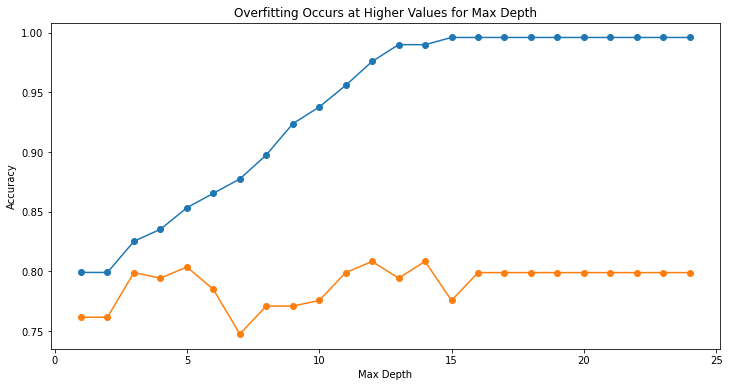

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [64]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.853414,0.803738,0.049675
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.785047,0.080415
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515


In [65]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Train Model
# Create the object

# Create the Random Forest object with desired hyper-parameters.

# RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [79]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [ ]:
# Fit the model

# Fit the random forest algorithm to the training data.

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [ ]:
# Feature Importance

# Evaluate importance, or weight, of each feature.

In [81]:
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [82]:
print(rf.feature_importances_)

# The higher number the feature importance == more important the feature.
# The importance of a feature is computed as the (normalized) total 
# reduction of the criterion brought by that feature.

[2.12370197e-01 5.47282154e-02 3.47804130e-02 2.53696522e-01
 2.09353487e-02 2.95016512e-01 1.79287464e-02 6.97923944e-02
 2.86967830e-04 1.40123282e-02 2.64523549e-02]


In [83]:
# Make Predictions on survival

y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
# Estimate Probability

# Estimate the probability ofsurvival, using the training data.

In [84]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.75929355, 0.24070645],
       [0.2463612 , 0.7536388 ],
       [0.9507381 , 0.0492619 ],
       [0.0208    , 0.9792    ],
       [0.01241379, 0.98758621],
       [0.82142262, 0.17857738],
       [0.87863043, 0.12136957],
       [0.95576234, 0.04423766],
       [0.97530773, 0.02469227],
       [1.        , 0.        ],
       [0.77567576, 0.22432424],
       [0.90112367, 0.09887633],
       [0.0333    , 0.9667    ],
       [0.67370867, 0.32629133],
       [0.85342756, 0.14657244],
       [0.59754483, 0.40245517],
       [0.96283399, 0.03716601],
       [0.0333908 , 0.9666092 ],
       [0.63117782, 0.36882218],
       [0.80304203, 0.19695797],
       [0.24282401, 0.75717599],
       [0.96827401, 0.03172599],
       [0.01      , 0.99      ],
       [0.02654423, 0.97345577],
       [0.59022058, 0.40977942],
       [0.9776132 , 0.0223868 ],
       [0.04333333, 0.95666667],
       [0.75052189, 0.24947811],
       [0.83122834, 0.16877166],
       [0.93779347, 0.06220653],
       [0.

In [ ]:
# Evaluate Model
# Compute the Accuracy

In [90]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [ ]:
# Create a confusion matrix

In [91]:
print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 14 177]]


In [ ]:
# Create a classificaiton report

# Precision: TP/(tp+FP)
 
# Recall: TP/(TP+FN)
 
# F1-Score: A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.
# F1 between zero and one

# F1-score = harmonic mean = 2/(1/precision+1/recall)
# Support: number of occurrences of each class.

In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       307
           1       1.00      0.93      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



In [ ]:
# Validate Model
# Evaluate on Out-of-Sample data

# Compute the accuracy of the model when run on the validate dataset.

In [93]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


In [94]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

TN, FP, FN, TP

(307, 0, 2, 189)

In [95]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [96]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9959839357429718 

True Positive Rate/Sensitivity/Recall/Power: 0.9895287958115183 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0 

True Negative Rate/Specificity/Selectivity: 1.0 

False Negative Rate/Miss Rate: 0.010471204188481676 

Precision/PPV: 1.0 

F1 Score: 0.9947368421052631 

Support (0): 307 

Support (1): 191


In [ ]:
# Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [97]:
# loop to adjust depth
for i in range(1, 10):
    # Make the model
    rf = RandomForestClassifier(max_depth=10-i, min_samples_leaf=1+i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"RF with max depth of {i}")
    print(pd.DataFrame(report))
    print()

RF with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.898204    0.957317  0.917671    0.927760      0.920876
recall       0.977199    0.821990  0.917671    0.899594      0.917671
f1-score     0.936037    0.884507  0.917671    0.910272      0.916274
support    307.000000  191.000000  0.917671  498.000000    498.000000

RF with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.883582    0.932515  0.899598    0.908049      0.902350
recall       0.964169    0.795812  0.899598    0.879990      0.899598
f1-score     0.922118    0.858757  0.899598    0.890438      0.897817
support    307.000000  191.000000  0.899598  498.000000    498.000000

RF with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.845714    0.925676  0.869478    0.885695      0.876382
recall       0.964169    0.717277  0.869478    0.840723      0.869478
f1-score     0.9010

In [106]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,10):
    rf = RandomForestClassifier(max_depth=10-i, min_samples_leaf=1, random_state=123) #make model 

    rf = rf.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=rf.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)#use model on validate
    
    output = {
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.957831,0.808411,0.149420
1,2,0.939759,0.808411,0.131348
2,3,0.921687,0.817757,0.103930
3,4,0.887550,0.817757,0.069793
4,5,0.863454,0.808411,0.055043
5,6,0.847390,0.822430,0.024960
6,7,0.839357,0.799065,0.040292
7,8,0.815261,0.780374,0.034887
8,9,0.769076,0.752336,0.016740


In [143]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,25):
    rf = RandomForestClassifier(max_depth=25-i, min_samples_leaf=i, random_state=123) #make model 

    rf = rf.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=rf.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)#use model on validate
    
    output = {
        "min_samples_leaf":1+i,
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,1,0.995984,0.794393,0.201591
1,3,2,0.923695,0.817757,0.105938
2,4,3,0.903614,0.813084,0.090530
3,5,4,0.889558,0.803738,0.085820
4,6,5,0.879518,0.808411,0.071107
5,7,6,0.873494,0.799065,0.074429
6,8,7,0.859438,0.789720,0.069718
7,9,8,0.857430,0.789720,0.067710
8,10,9,0.847390,0.803738,0.043651
9,11,10,0.843373,0.813084,0.030289


In [145]:
sns.pairplot(df, hue='max_depth')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

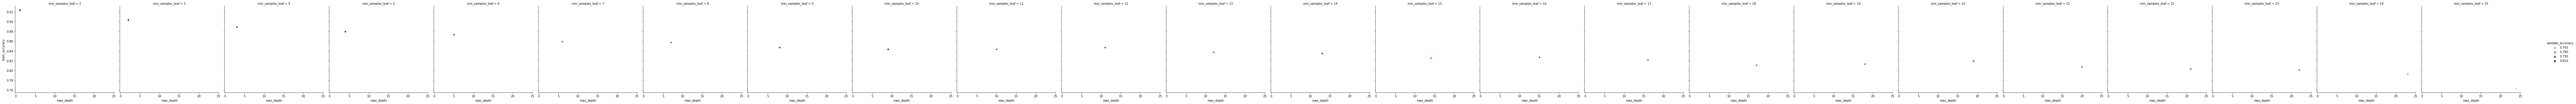

In [137]:
sns.relplot(data=df, x='max_depth', y='train_accuracy', kind='scatter', hue='validate_accuracy', col='min_samples_leaf')


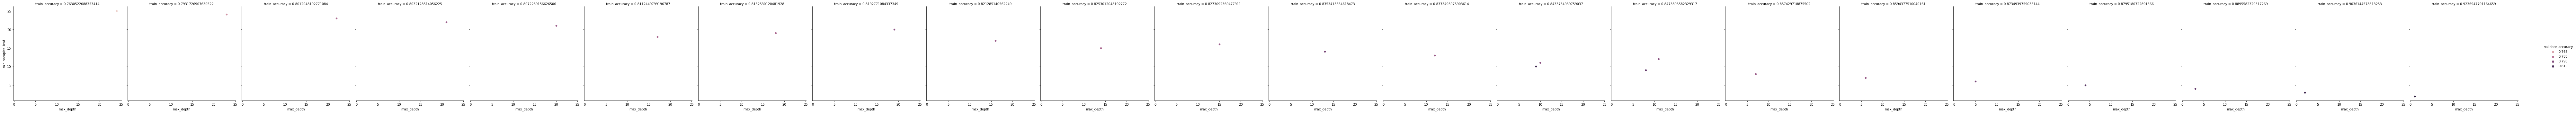

In [138]:
sns.relplot(data=df, x='max_depth', y='min_samples_leaf', kind='scatter', hue='validate_accuracy', col='train_accuracy')


In [142]:
sns.pairplot(df, x_vars='validate_accuracy', hue='max_depth',size='min_samples_leaf')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
sns.pairplot(df, hue='max_depth')
plt.show()

In [ ]:
pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)